In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

52


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,a456a71a344389258ad8165626e7ed62b0e42094,utile-sida,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,...,140,85,63.847059,26.335973,24,45.00,60.0,76.0,199,COT
1,fc34cab5e6984e3388447f5194707844df059487,cased-noma,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,direct/format-few.txt,cq.txt,manual/direct.json,...,21,79,9.658228,11.465540,3,4.00,5.0,8.5,64,DIRECT
2,31bec2703322d74d14fcfba4ffe56303d351f513,waney-sack,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,direct/format-few.txt,cq.txt,manual/direct.json,...,21,80,12.125000,19.903803,3,4.00,5.0,9.0,115,DIRECT
3,6faf3338d66ff406087502feadc8fe20fee03b1c,agaze-ryas,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,...,107,75,51.866667,19.260191,17,38.50,49.0,61.0,132,CCOT
4,33f50795dbbbc251d7c2be50e5b09f9343f7f92c,lurid-outs,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,...,85,76,50.092105,16.424516,23,38.75,47.5,60.0,99,CCOT


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [ ]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,uveal-book,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.650000,0.740079,...,85,80,50.662500,16.600247,23,40.00,47.0,61.0,99,CCOT
1,lurid-outs,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.660000,0.752330,...,85,76,50.092105,16.424516,23,38.75,47.5,60.0,99,CCOT
2,sarky-user,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.656667,0.749906,...,100,75,50.213333,15.790258,25,39.00,47.0,58.0,93,CCOT
3,cutty-rams,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.640000,0.750016,...,91,77,48.805195,17.314459,23,36.00,46.0,57.0,105,CCOT
4,alpha-shoe,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,1,1,0.663333,0.758849,...,130,73,51.095890,18.960606,17,39.00,48.0,60.0,142,CCOT


In [5]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [6]:
# make temperature 1 decimal
df["params.qa.temperature"] = df["params.qa.temperature"].round(1)

In [7]:
def parse_instruction(row):
    technique = row["params.qa.technique"].lower()
    sp = row["params.qa.system_prompt"].lower().replace(technique + "/", "")
    fs = row["params.qa.few_shot_examples"].lower().replace("/" + technique, "")
    return f"{technique}/{sp}/{fs}"

df["instruction"] = df.apply(parse_instruction, axis=1)

In [8]:
target_param_cols

['params.qa.technique',
 'params.qa.system_prompt',
 'params.qa.few_shot_examples',
 'params.qa.n_shot',
 'params.qa.n_sc',
 'params.qa.temperature']

In [9]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
19,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.5,0.716667,0.785496,0.80,0.849960,...,52.0,96,66,47.661538,18.043227,26,36.0,45.0,57.0,114
7,COK,cok/adapted,manual/cok,1,1,0.5,0.696667,0.776368,0.77,0.842713,...,110.0,186,71,102.014085,28.718084,56,78.5,101.0,120.0,180
10,COT,cot/format-thought,manual/cot,1,1,0.0,0.660000,0.761800,0.74,0.839310,...,73.0,199,73,77.472222,29.759839,39,55.5,75.5,89.0,225
2,CCOT,ccot/format-thought,manual/ccot,1,1,0.0,0.663333,0.758849,0.75,0.838738,...,54.0,130,75,51.866667,19.260191,17,39.0,49.0,61.0,142
24,DIRECT,direct/format-few,manual/direct,1,1,0.0,0.630000,0.739280,0.69,0.828774,...,7.0,21,80,12.125000,19.903803,3,4.0,5.0,9.0,115


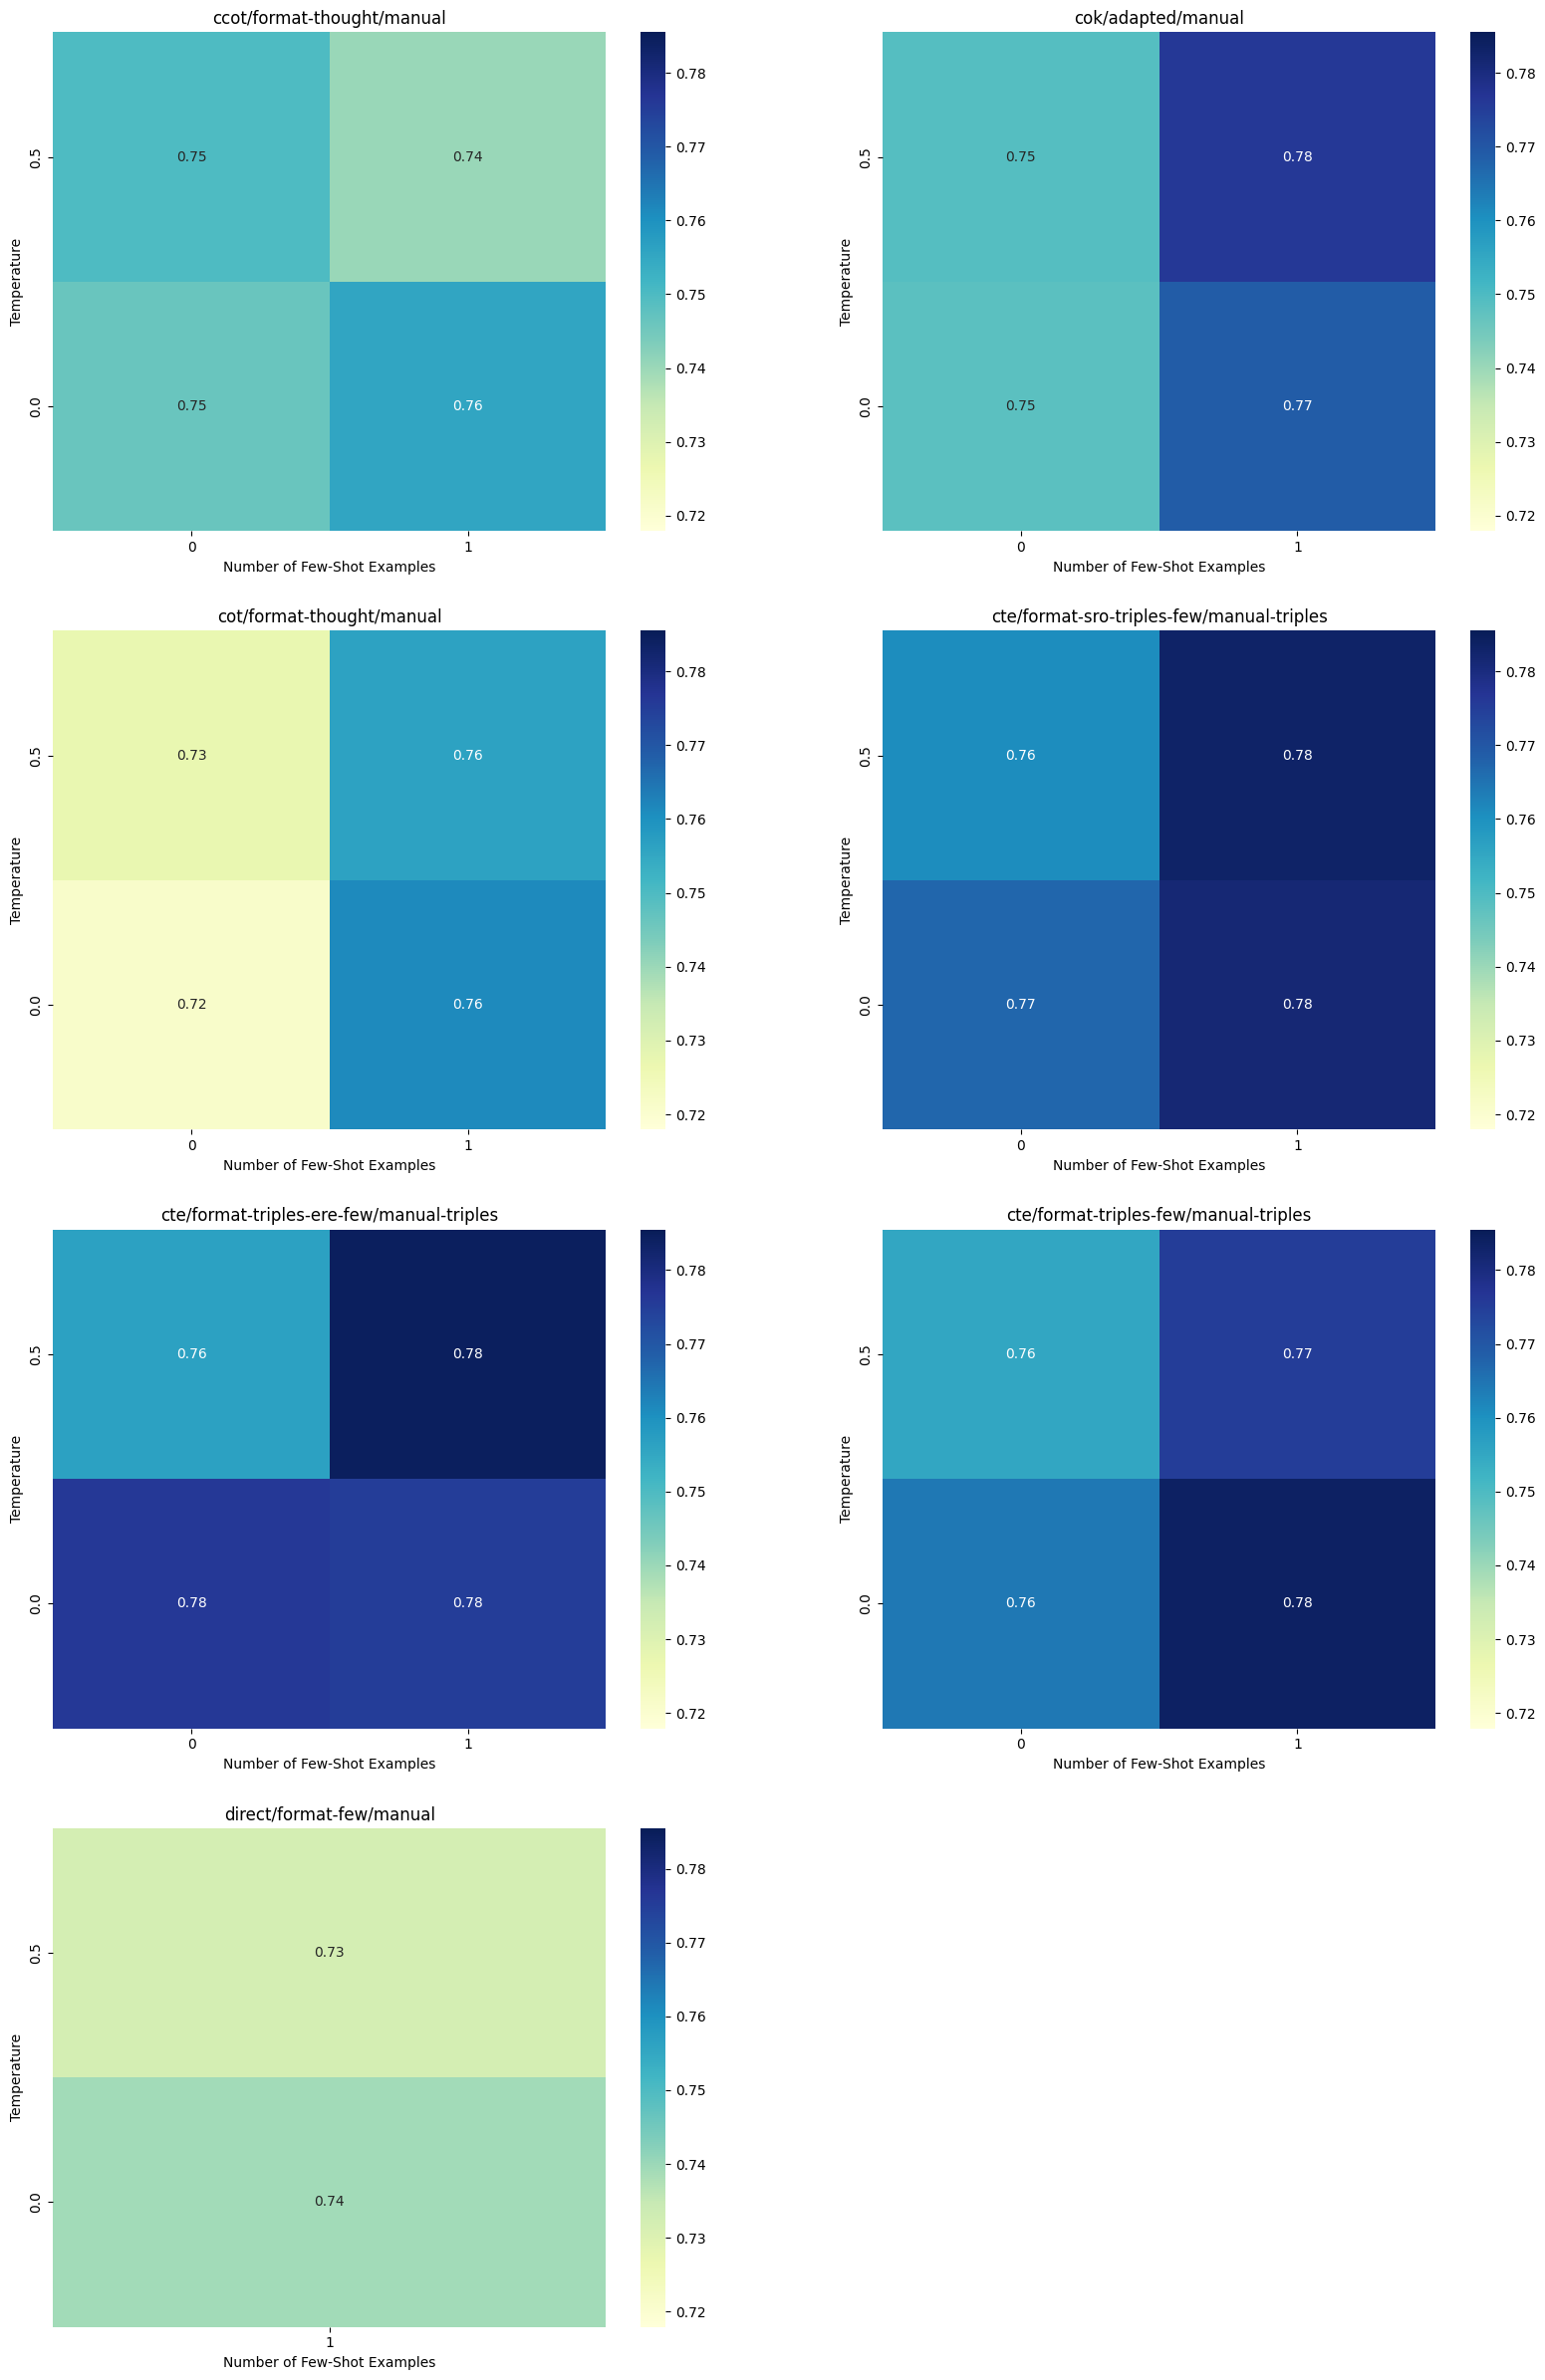

In [10]:
# Example 2: Heatmap of F1 scores based on temperature and number of few-shot examples per technique
instructions = df["instruction"].unique()
n = len(instructions)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

vmin = df["metrics.f1"].min()
vmax = df["metrics.f1"].max()

for ax, instruction in zip(axes.flatten(), instructions):
    subset_df = df[df["instruction"] == instruction]
    pivot_table = subset_df.pivot_table(
        values="metrics.f1",
        index="params.qa.temperature",
        columns="params.qa.n_shot",
        aggfunc="mean",
    )
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        ax=ax,
        yticklabels=True,
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(instruction)
    ax.set_xlabel("Number of Few-Shot Examples")
    ax.set_ylabel("Temperature")
    ax.invert_yaxis()

# Remove any empty subplots
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots
plt.show()
